In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import re
import string
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# pip install pyLDAvis

### Removing all blank lines in each text file

In [4]:
folder = 'Articles'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        lines = file.readlines()
        
    lines = [line.strip() for line in lines if line.strip()]
    
    with open(os.path.join(folder, file_name), 'w', encoding='latin-1') as file:
        _=file.write('\n'.join(lines))
        _=file.truncate()

### Splitting each text file into individual articles:
- Create a separate folder called "Articles_split" where all the individual articles are stored
- Remove any articles that are blank

In [5]:
folder_out = 'Articles_split'

if not os.path.exists(folder_out):
    os.makedirs(folder_out)

end_pattern = r'Document\s+\w+'

file_names = [file_name for file_name in os.listdir(folder) if file_name.endswith('.txt')]

for file_name in file_names:
    with open(os.path.join(folder, file_name), 'r', encoding='latin-1') as file:
        file_contents = file.read()
        
    articles = re.split(end_pattern, file_contents) #splitting into articles based on end pattern
#     if articles[-1].strip():
#         articles = articles[:-1]
    
    # Write those splitted articles into separate text files and store in output folder defined above
    for i, article in enumerate(articles):
        article_filename = f'{os.path.splitext(file_name)[0]}_article_{i + 1}.txt'
        
        with open(os.path.join(folder_out, article_filename), 'w', encoding='latin-1') as output_file:
            _=output_file.write(article)
            
    # Removing blank articles:            
    if os.path.getsize(os.path.join(folder_out, article_filename)) == 0 or open(os.path.join(folder_out, article_filename), encoding='latin-1').read().isspace():
        _=os.remove(os.path.join(folder_out, article_filename))

### Preprocessing

In [6]:
processed_text = []

file_names = [file_name for file_name in os.listdir(folder_out) if file_name.endswith('.txt')]

for file_name in file_names:

    with open(os.path.join(folder_out, file_name), 'r', encoding='latin-1') as file:
        text = file.read().strip()

        #Remove punctuation:
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        #Remove numbers:
        text = re.sub(r'\d+', '', text)

        #Remove roman numerals:
        text = re.sub(r'\bM{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b', '', text)
        
        #Tokenization:
        words = word_tokenize(text)

        #Lowercase:
        words = [word.lower() for word in words]

        #Lemmatization:
        lemma = WordNetLemmatizer()
        words = [lemma.lemmatize(word) for word in words]

        #Stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

        #Normalization and Cleaning:
        text = ' '.join(words)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'can\'t', 'cannot', text)

        processed_text.append(text)

### Removing stop words and finding top 30 common words

In [7]:
preprocessed_words = []
for i in processed_text:
    preprocessed_words.extend(i.split())

import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines())

post_processed_words = [word for word in preprocessed_words if word.lower() not in stop_words]

freq_dist = nltk.FreqDist(post_processed_words)
common_30 = freq_dist.most_common(30)

df_common_30 = pd.DataFrame(common_30, columns=['Common Words', 'Frequency'])
df_common_30

,Common Words,Frequency
0,state,10321
1,ha,7638
2,thi,7043
3,trump,6915
4,islam,6706
5,time,5948
6,presid,4508
7,attack,4342
8,american,4075
9,peopl,3989


### Top 30 most common bigrams

In [8]:
bigrams = nltk.bigrams(post_processed_words)
freq_dist_bigram = nltk.FreqDist(bigrams)
common_bigram_30 = freq_dist_bigram.most_common(30)

df_common_bigram_30 = pd.DataFrame(common_bigram_30, columns=['Common Bi-gram Words', 'Frequency'])
df_common_bigram_30

,Common Bi-gram Words,Frequency
0,"(islam, state)",5607
1,"(york, time)",3177
2,"(unit, state)",2855
3,"(compani, reserv)",1627
4,"(english, copyright)",1489
5,"(time, compani)",1114
6,"(white, hous)",1030
7,"(copyright, york)",978
8,"(presid, trump)",907
9,"(dow, jone)",769


### Wordcloud for top 30 most common words

<Figure size 576x576 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

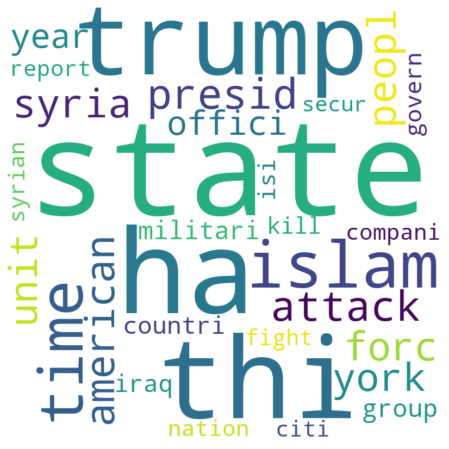

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dict(common_30))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Topic Modeling

In [10]:
from pprint import pprint
import gensim # Gensim for Topic Modeling
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [11]:
post_data = [post_processed_words]

In [12]:
# Create Dictionary 
id2word = corpora.Dictionary(post_data)

# Create Corpus 
texts = post_data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View 
# print(corpus[:1])

In [13]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, #play with this number
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100, #keep this same
                                           passes=10, #keep this same
                                           alpha='auto',
                                           per_word_topics=True)

In [14]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"state" + 0.008*"ha" + 0.007*"thi" + 0.007*"trump" + 0.007*"islam" + '
  '0.006*"time" + 0.005*"presid" + 0.005*"attack" + 0.004*"american" + '
  '0.004*"peopl"'),
 (1,
  '0.006*"state" + 0.006*"ha" + 0.004*"islam" + 0.004*"trump" + 0.003*"thi" + '
  '0.003*"time" + 0.003*"presid" + 0.003*"peopl" + 0.003*"unit" + '
  '0.003*"attack"'),
 (2,
  '0.006*"state" + 0.004*"ha" + 0.004*"trump" + 0.003*"islam" + 0.003*"thi" + '
  '0.003*"time" + 0.003*"attack" + 0.003*"presid" + 0.002*"forc" + '
  '0.002*"militari"'),
 (3,
  '0.003*"ha" + 0.002*"trump" + 0.002*"state" + 0.002*"thi" + 0.002*"time" + '
  '0.002*"islam" + 0.001*"peopl" + 0.001*"american" + 0.001*"syria" + '
  '0.001*"attack"'),
 (4,
  '0.006*"state" + 0.005*"ha" + 0.004*"thi" + 0.004*"time" + 0.004*"islam" + '
  '0.003*"trump" + 0.003*"york" + 0.003*"presid" + 0.003*"countri" + '
  '0.002*"attack"')]


In [15]:
# Compute Perplexity
print('Perplexity: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=post_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -8.271404456915409

Coherence Score:  0.33215454871193


In [16]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115825 -0.000005       1        1  99.999987
1     -0.000797  0.001155       2        1   0.000004
4      0.005369 -0.001753       3        1   0.000004
2      0.022986  0.000666       4        1   0.000003
3      0.088267 -0.000063       5        1   0.000003, topic_info=          Term          Freq         Total Category  logprob  loglift
29567    state  10278.000000  10278.000000  Default  30.0000  30.0000
13089       ha   7574.000000   7574.000000  Default  29.0000  29.0000
31282      thi   7036.000000   7036.000000  Default  28.0000  28.0000
32079    trump   6912.000000   6912.000000  Default  27.0000  27.0000
15757    islam   6689.000000   6689.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
15599    iraqi      0.000017   2253.975630   Topic5  -7.2580  -1.2256
15691      isi      0.000018   2804.568414   Topic5  -7.1803  -1.3665
6381   compani      0.000017   2498.252105   Topic5  -7.2369  -1.3074
22018   offici      0.000020   3456.295896   Topic5  -7.1007  -1.4958
16910     kill      0.000017   2648.712319   Topic5  -7.2409  -1.3699

[361 rows x 6 columns], token_table=       Topic      Freq                                         Term
term                                                               
292        1  1.006342                                  activitiesâ
300        1  0.996871                                   actorsâaid
378        1  1.000241                                    administr
1232       1  0.999293                                      alreadi
1383       1  1.000091                                     american
...      ...       ...                                          ...
38781      1  1.013382                                         ååäç
39330      1  1.010314                                  æï¼æ²çromeo
39466      1  1.002478                            çåèµï¼æ²ç¹ä¼åå¾æå
39734      1  0.997677  èèæ¾åçäèäªç¾åç¹ï¼åèåçäèè³ï¼éåèåçäèè³ãææéæèç
39935      1  1.005568                                      ï¼èååäå

[163 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])